In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import networkx as nx
import sys
import random
sys.path.append('../src/')
from random_graph import RandGraph
import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
from random import choice

In [3]:
steps = 500

g = RandGraph(actors=10000, moving = 100, n_paths = 100, graph_type='hongo_district')

data, nodes = g.step(n=steps)
d = {}
for x,node in enumerate(nodes):
    d[node] = data[:,x]
df = pd.DataFrame.from_dict(d)

df['congestion'] = df.iloc[:,:-6].mean(axis=1)
df['nb_saturated'] = (df.iloc[:,:-6] == 1.0).sum(axis=1)

% 100 ||||||||||

In [4]:
df.head()

,24,25,26,27,28,29,30,31,32,33,...,142,143,144,145,146,147,148,149,congestion,nb_saturated
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
3,0.2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017222,1
4,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010972,0


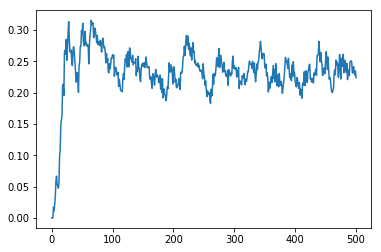

In [5]:
df.congestion.plot()
plt.show()

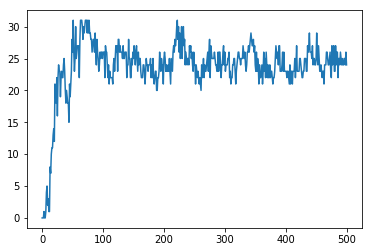

In [6]:
df.nb_saturated.plot()
plt.show()

In [7]:
# save dataset
df.to_csv('../data/hongo_graph_saturation.csv')